# Marine Regions

In [5]:
import odp

In [6]:
db=odp.Database()

In [7]:
db.datasets

,schema,table
name,,
World Ocean Database Measurements,raw_wod,observations_temp
World Ocean Database Casts,raw_wod,casts_temp
OBIS Biodiversity,raw_obis,occurences
World Marine Heritage Sites,raw_marineregions,worldmarineheritagesites
World Seas IHO,raw_marineregions,world_seas_iho_v3
EEZ Land Union,raw_marineregions,eez_land_union_v3_202003
Intersect EEZ IHO,raw_marineregions,intersect_eez_iho_v4_2020
World EEZ,raw_marineregions,world_eez_v11_20191118


### Sample data

In [20]:
df_sample=db.query('Intersect EEZ IHO',
           limit=5)
df_sample

/Users/kristianauthen/opt/anaconda3/envs/py38/lib/python3.8/site-packages/odp-0.0.1-py3.8.egg/odp/odp_sdk_experimental.py:129: UserWarning: Results reached row limit. Increase limit if needed
  warnings.warn("Results reached row limit. Increase limit if needed")


,fid,MRGID,MARREGION,MRGID_IHO,IHO_SEA,MRGID_EEZ,EEZ,MRGID_TER1,TERRITORY1,ISO_TER1,...,ISO_TER3,UN_TER3,MRGID_SOV3,SOVEREIGN3,ISO_SOV3,UN_SOV3,AREA_KM2,X_1,Y_1,geometry
0,1.0,25614,Albanian part of the Adriatic Sea,3314,Adriatic Sea,5670,Albanian Exclusive Economic Zone,2153,Albania,ALB,...,None,0,0,None,None,0,12127,19.11030,40.93096,"POLYGON ((19.98580 39.74337, 19.95859 39.74320..."
1,2.0,25622,Albanian part of the Ionian Sea,3351,Ionian Sea,5670,Albanian Exclusive Economic Zone,2153,Albania,ALB,...,None,0,0,None,None,0,39,19.97118,39.69394,"POLYGON ((20.00835 39.69182, 20.00810 39.69187..."
2,3.0,25603,Algerian part of the Alboran Sea,3324,Alboran Sea,8378,Algerian Exclusive Economic Zone,2152,Algeria,DZA,...,None,0,0,None,None,0,7045,-1.74716,35.58150,"POLYGON ((-1.18826 35.57788, -1.18973 35.57580..."
3,4.0,25180,Algerian part of the Mediterranean Sea - Weste...,4279,Mediterranean Sea - Western Basin,8378,Algerian Exclusive Economic Zone,2152,Algeria,DZA,...,None,0,0,None,None,0,124148,3.83338,37.29350,"POLYGON ((7.81205 38.00998, 7.81355 38.00945, ..."
4,5.0,25647,American Samoa part of the South Pacific Ocean,1910,South Pacific Ocean,8444,American Samoa Exclusive Economic Zone,8670,American Samoa,ASM,...,None,0,0,None,None,0,405830,-169.06347,-13.85484,"POLYGON ((-168.48917 -11.04444, -168.46611 -11..."


### All shapes belonging with Norwegian sovereignity 

In [26]:
df=db.query('Intersect EEZ IHO',
           filters=['''"SOVEREIGN1" = 'Norway' '''])
df

,fid,MRGID,MARREGION,MRGID_IHO,IHO_SEA,MRGID_EEZ,EEZ,MRGID_TER1,TERRITORY1,ISO_TER1,...,ISO_TER3,UN_TER3,MRGID_SOV3,SOVEREIGN3,ISO_SOV3,UN_SOV3,AREA_KM2,X_1,Y_1,geometry
0,258.0,25236,Jan Mayen part of the Greenland Sea,2356,Greenland Sea,8437,Jan Mayen Exclusive Economic Zone,5343,Jan Mayen,SJM,...,None,0,0,None,None,0,121220,-7.56373,72.18359,"POLYGON ((-8.08625 71.14481, -8.11043 71.14313..."
1,259.0,25241,Jan Mayen part of the Norwegian Sea,2353,Norwegian Sea,8437,Jan Mayen Exclusive Economic Zone,5343,Jan Mayen,SJM,...,None,0,0,None,None,0,171687,-3.46641,70.28880,"POLYGON ((2.35622 71.17424, 2.35184 71.15638, ..."
2,289.0,49666,Joint regime area Sweden - Norway part of the ...,2379,Skagerrak,48977,Joint regime area Sweden / Norway,2252,Norway,NOR,...,None,0,0,None,None,0,140,10.50095,58.80998,"POLYGON ((10.59444 58.76147, 10.26814 58.77569..."
3,362.0,25246,Norwegian part of the Barentsz Sea,4247,Barentsz Sea,5686,Norwegian Exclusive Economic Zone,2252,Norway,NOR,...,None,0,0,None,None,0,164067,28.60795,72.69014,"POLYGON ((33.70659 73.98140, 33.74218 73.97512..."
4,363.0,25233,Norwegian part of the North Sea,2350,North Sea,5686,Norwegian Exclusive Economic Zone,2252,Norway,NOR,...,None,0,0,None,None,0,119489,4.05390,58.58220,"POLYGON ((4.73328 61.00000, 4.79661 61.00000, ..."
5,364.0,25242,Norwegian part of the Norwegian Sea,2353,Norwegian Sea,5686,Norwegian Exclusive Economic Zone,2252,Norway,NOR,...,None,0,0,None,None,0,634267,10.78765,68.19458,"POLYGON ((25.71287 71.20270, 25.77685 71.17247..."
6,365.0,25229,Norwegian part of the Skagerrak,2379,Skagerrak,5686,Norwegian Exclusive Economic Zone,2252,Norway,NOR,...,None,0,0,None,None,0,15216,9.20065,58.36211,"POLYGON ((10.66161 59.91288, 10.66295 59.91039..."
7,499.0,25260,Svalbard part of the Arctic Ocean,1906,Arctic Ocean,33181,Svalbard Exclusive Economic Zone,5334,Svalbard,SJM,...,None,0,0,None,None,0,187696,20.40728,82.09033,"POLYGON ((34.99941 81.05324, 34.99918 80.27256..."
8,500.0,49672,Svalbard part of the Barentsz Sea,4247,Barentsz Sea,33181,Svalbard Exclusive Economic Zone,5334,Svalbard,SJM,...,None,0,0,None,None,0,282429,28.14389,77.00926,"POLYGON ((34.99918 80.27256, 34.99889 79.28466..."
9,501.0,25237,Svalbard part of the Greenland Sea,2356,Greenland Sea,33181,Svalbard Exclusive Economic Zone,5334,Svalbard,SJM,...,None,0,0,None,None,0,229816,6.10642,77.90406,"POLYGON ((16.26311 80.06461, 16.26092 80.06421..."


<AxesSubplot:>

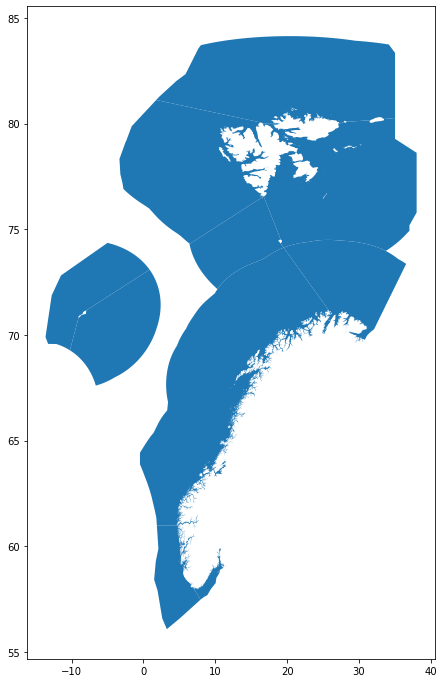

In [28]:
df.plot(figsize=(12,12))